## Disease Prediction basis Patient History of Disease and Symptoms

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

### Import Data

#### Load Symptom-Severity dataset

In [3]:
smpv = pd.read_csv('Symptom-severity.csv')
# Get the information about the dataset including the index dtype and columns, non-null values and memory usage
smpv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Symptom  133 non-null    object
 1   weight   133 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 1.6+ KB


In [4]:
smpv.head()

,Symptom,weight
0,itching,1
1,skin_rash,3
2,nodal_skin_eruptions,4
3,continuous_sneezing,4
4,shivering,5


##### Weight here is the Effectiveness of the Symptom per two days on a scale of 10

In [5]:
smpv_c = smpv['weight'].value_counts().rename_axis('Unique_weights').reset_index(name='Count_of_Symptoms')
smpv_c

,Unique_weights,Count_of_Symptoms
0,4,39
1,5,35
2,3,21
3,6,17
4,2,15
5,7,5
6,1,1


From, the above dataframe, we can say that there are about **39 Symptoms** which have an **effect rating of 4 out of 10**, **per two days** for a person having a disease. While, there is only **1 Symptom** which has the **least effect rating of 1 out of 10**, **per two days** for a person having a disease.

In [6]:
def show_values(axs, orient="v"):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{}'.format(int(p.get_height()))
                ax.text(_x, _y, value, ha="center") 


    if isinstance(axs, np.ndarray):
        for ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

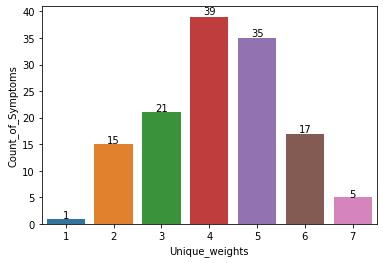

In [7]:
p = sns.barplot(x='Unique_weights',y='Count_of_Symptoms',data=smpv_c,ci=None)
show_values(p)

#### Load Disease vs Symptom Dataset

In [8]:
smp_pr = pd.read_csv('dataset.csv')
smp_pr.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Dimension of Disease vs Symptom Datset
smp_pr.shape

(4920, 18)

In [10]:
smpr_c = smp_pr['Disease'].value_counts().rename_axis('Unique_Diseases').reset_index(name='Distribution_of_Diseases')
smpr_c

,Unique_Diseases,Distribution_of_Diseases
0,Fungal infection,120
1,Hepatitis C,120
2,Hepatitis E,120
3,Alcoholic hepatitis,120
4,Tuberculosis,120
5,Common Cold,120
6,Pneumonia,120
7,Dimorphic hemmorhoids(piles),120
8,Heart attack,120
9,Varicose veins,120


<AxesSubplot:xlabel='Distribution_of_Diseases', ylabel='Unique_Diseases'>

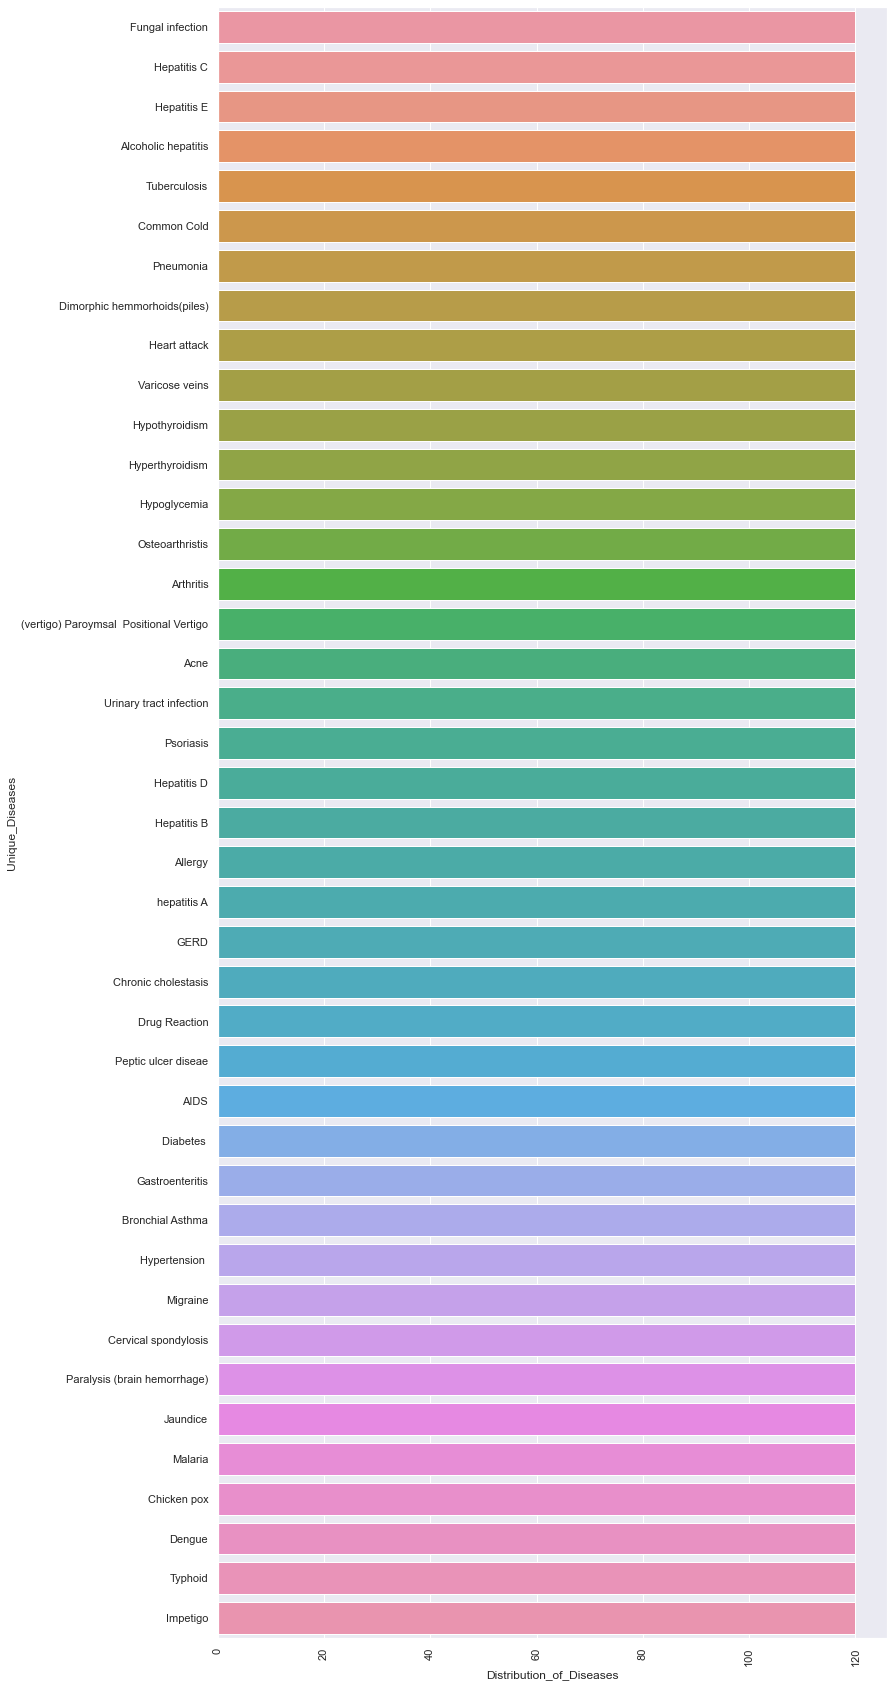

In [11]:
sns.set_theme(style="darkgrid")
plt.figure(figsize = (12,30))
plt.xticks(rotation = 90)
sns.barplot(x="Distribution_of_Diseases",y="Unique_Diseases", data=smpr_c)

**From the above BarPlot, it can be said that the data is balanced for classification training, i.e. each Disease category has the same number of records in our data, hence the Model that will be used will not give priority to only some catgeories but all will have equal priority. It helps Model to perform well on new data, which is our Test Data (we will check in the later part)**

### Data Cleaning

In [12]:
# Check Number of NaN values in the dataset
smp_pr.isna().sum()

Disease          0
Symptom_1        0
Symptom_2        0
Symptom_3        0
Symptom_4      348
Symptom_5     1206
Symptom_6     1986
Symptom_7     2652
Symptom_8     2976
Symptom_9     3228
Symptom_10    3408
Symptom_11    3726
Symptom_12    4176
Symptom_13    4416
Symptom_14    4614
Symptom_15    4680
Symptom_16    4728
Symptom_17    4848
dtype: int64

In [13]:
cols = smp_pr.columns
data = smp_pr[cols].values.flatten()
print(data)

['Fungal infection' 'itching' ' skin_rash' ... nan nan nan]


In [14]:
cols = smp_pr.columns
data = smp_pr[cols].values.flatten()

s = pd.Series(data)
s = s.str.strip()
s = s.values.reshape(smp_pr.shape)

df = pd.DataFrame(s, columns=smp_pr.columns)

df = df.fillna(0)
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Fungal infection,itching,skin_rash,dischromic _patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Now, we need to **replace the Symptoms** with their **respective Effectiveness weights per two days** from the **Symptom-Severity** dataset

In [15]:
# Create a dictionary of each Symptoms vs their respective effectiveness Weights per two days 
lookup_data = smpv.set_index('Symptom')['weight'].to_dict()
lookup_data

{'itching': 1,
 'skin_rash': 3,
 'nodal_skin_eruptions': 4,
 'continuous_sneezing': 4,
 'shivering': 5,
 'chills': 3,
 'joint_pain': 3,
 'stomach_pain': 5,
 'acidity': 3,
 'ulcers_on_tongue': 4,
 'muscle_wasting': 3,
 'vomiting': 5,
 'burning_micturition': 6,
 'spotting_urination': 6,
 'fatigue': 4,
 'weight_gain': 3,
 'anxiety': 4,
 'cold_hands_and_feets': 5,
 'mood_swings': 3,
 'weight_loss': 3,
 'restlessness': 5,
 'lethargy': 2,
 'patches_in_throat': 6,
 'irregular_sugar_level': 5,
 'cough': 4,
 'high_fever': 7,
 'sunken_eyes': 3,
 'breathlessness': 4,
 'sweating': 3,
 'dehydration': 4,
 'indigestion': 5,
 'headache': 3,
 'yellowish_skin': 3,
 'dark_urine': 4,
 'nausea': 5,
 'loss_of_appetite': 4,
 'pain_behind_the_eyes': 4,
 'back_pain': 3,
 'constipation': 4,
 'abdominal_pain': 4,
 'diarrhoea': 6,
 'mild_fever': 5,
 'yellow_urine': 4,
 'yellowing_of_eyes': 4,
 'acute_liver_failure': 6,
 'fluid_overload': 4,
 'swelling_of_stomach': 7,
 'swelled_lymph_nodes': 6,
 'malaise': 6,
 'bl

In [16]:
# Use the above dictionary for replacing the Symptom category values in the respective Symptom features in our Disease vs Symptom data
df = df.replace(lookup_data)
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,1,3,4,dischromic _patches,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Fungal infection,3,4,dischromic _patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Fungal infection,1,4,dischromic _patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Fungal infection,1,3,dischromic _patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Fungal infection,1,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [17]:
cols_df = list(df)
del cols_df[0]
print(cols_df)

['Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4', 'Symptom_5', 'Symptom_6', 'Symptom_7', 'Symptom_8', 'Symptom_9', 'Symptom_10', 'Symptom_11', 'Symptom_12', 'Symptom_13', 'Symptom_14', 'Symptom_15', 'Symptom_16', 'Symptom_17']


In [18]:
data_new = df[cols_df].values.flatten()
dn = list()
for i in range(len(data_new)):
    dn.append(data_new[i])
dn1 = [e for e in dn if isinstance(e,str)]
dn2 = list(set(dn1))
dn2

['dischromic _patches', 'spotting_ urination', 'foul_smell_of urine']

From the above, we have found that - **'dischromic _patches', 'spotting_ urination', 'foul_smell_of urine'** Symptoms do not have weights defined in the Symptom-Severity dataset, hence we will replace them with 0 in our disease vs Symptom data

In [19]:
d = df.copy()
d = d.replace('dischromic _patches', 0)
d = d.replace('spotting_ urination',0)
d = d.replace('foul_smell_of urine',0)
d.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,1,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Fungal infection,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Fungal infection,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Fungal infection,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Fungal infection,1,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0


***The reason why we have converted our data in the above form is so that we can use it to present a Supervised Machine Learning Model, which will do the Prediction of the Disease on the basis of Symptoms combinations. And the data that the Machine Learning model will require as input to predict our Target variable (DISEASE) needs to be in Numeric form. Hence, we have replaced all the Symptoms with their corresponding weights from the Symptom-Severity dataset.***

### Model Data Preparation

In [20]:
X = d.iloc[:,1:].values
y = d['Disease'].values

### Split the data into Train and Test 

##### Training data - Input data required for training our model algorithm so that it can determine the pattern in this data
##### Test data - Split portion of data required for applying the Trained model pattern on it and predict values to be used for comparison with it

In [21]:
x_train, x_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size = 0.80)
# x_train - Predictor(Symptoms) train data
# x_test - Predictor(Symptoms) test data
# y_train - Target/Response(Disease) train data
# y_test - Target/Response(Disease) test data
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

# SVC - Support Vector Classifier used for Classifying/Predicting a category value in a dataset. 
# A Category represents a data value which defines a group  
model = SVC()
model.fit(x_train, y_train)

preds = model.predict(x_test)

(3936, 17) (984, 17) (3936,) (984,)


### Model Performance Evaluation

**Accuracy** is the fraction of predictions our model got right.

In [22]:
print('Accuracy% =', accuracy_score(y_test, preds)*100)

Accuracy% = 92.27642276422763


**From the above result, we can say that our model predicted 93% of our Test data correctly.**